# <font color = blue><div dir = rtl> השוואה בין הסימולציה לבין תוצאות הניסוי </div></font>
<font color = black> <div dir = rtl>  <br> על מנת לאמת את המודל שבנינו, ערכנו ניסוי שבעזרתו ניתן להראות את אמינות תוצאות הסימולציה. 




odict_values(['water', '90.04', '97.333', '124.666', '284.165', '1710.33'])
odict_values(['olive oil', '226.4', '230.33', '278.59', '472.651', '1964.4'])
odict_values(['milk', '110.8', '117.54', '151.2', '316.651', '1762.593'])


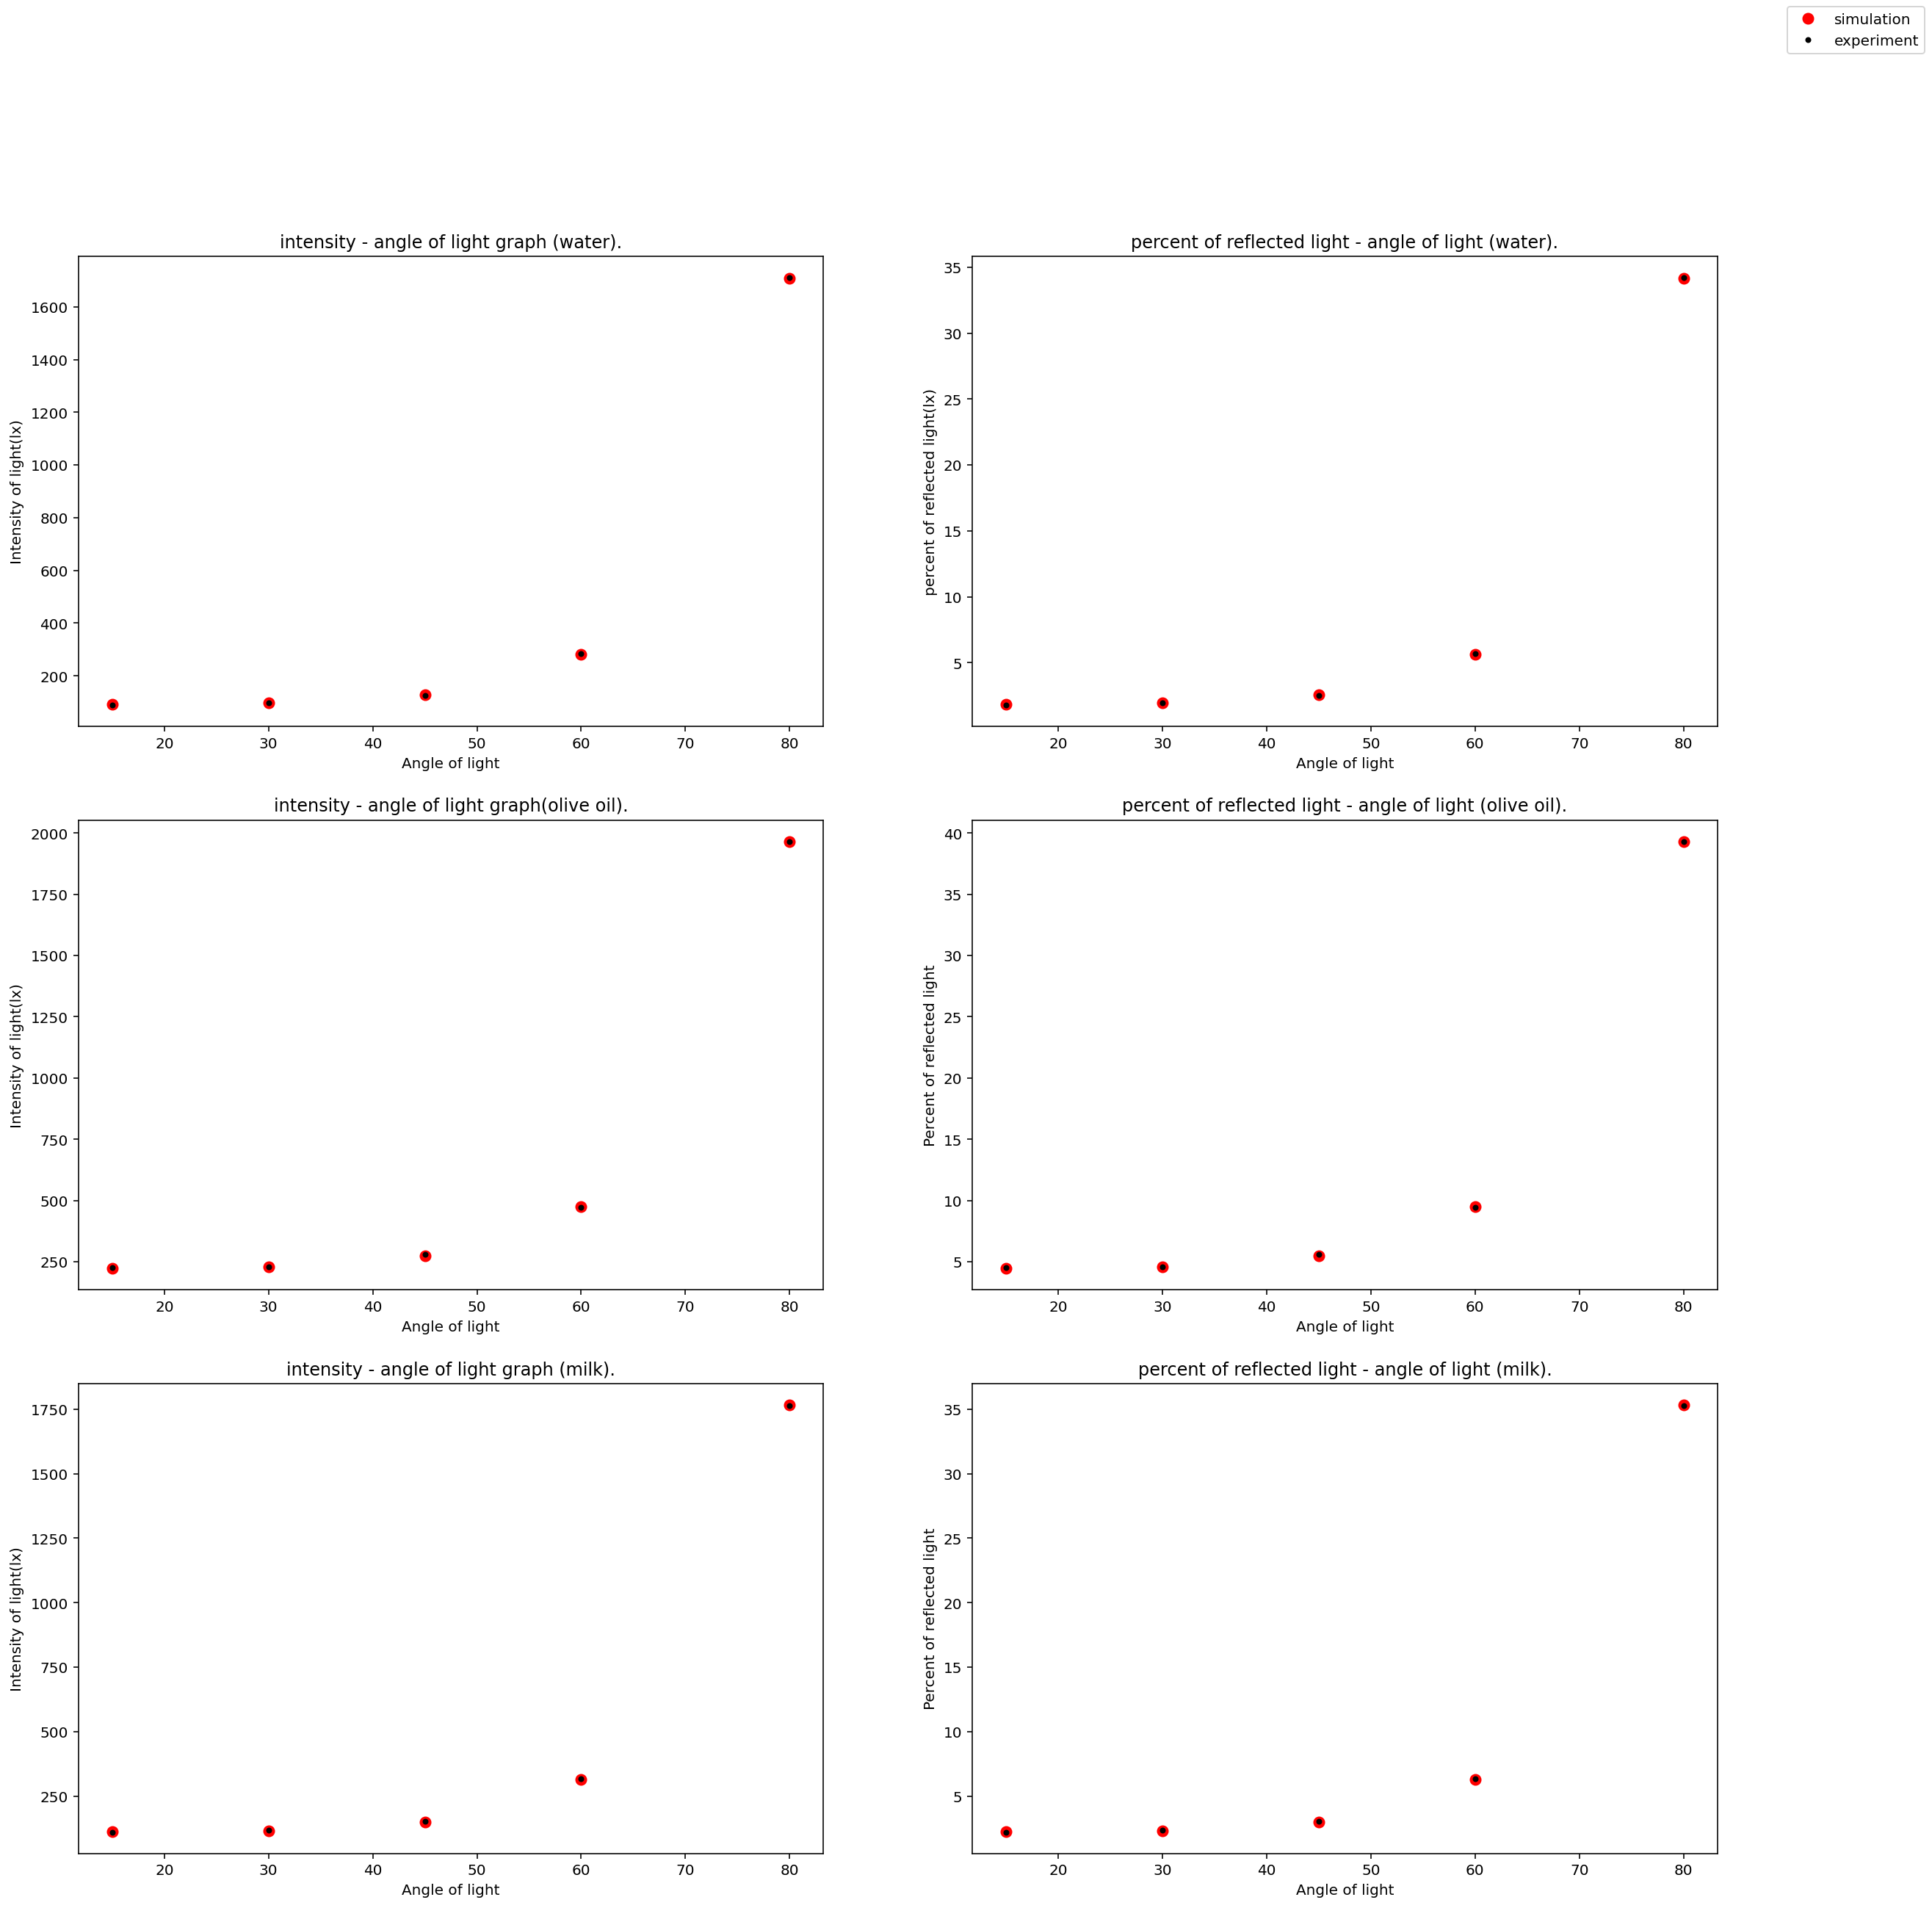

In [22]:
import csv #יבוא ספריות
import matplotlib.pyplot as plt

file_name_simulation = '/home/user/assignments/PROJECT2020/simulation results.csv' #קובץ עם תוצאות הסימולציה
simulaiton_file=open(file_name_simulation,'r')
simulation_data=list(csv.DictReader(simulaiton_file)) #העברה לרשימת מילונים

file_name_experiment = '/home/user/assignments/PROJECT2020/experiment results.csv' #קובץ עם תוצאות הניסוי
experiment_file = open(file_name_experiment, 'r')
experiment_data = list(csv.DictReader(experiment_file)) #העברת הנתונים לרשימת מילונים

def x_list_all_graph(simulation_data):
    """csv file --> list
    the function gets csv file with the results of the simulation
    and make a list with x values for all the graphs"""
    ls = [] #רשימה חדשה
    for i in simulation_data: # לולאה שרצה על רשימת המילונים
        for k in i: # לולאה שתרוץ על המפתחות
            if k =='material': #אם המשתנה נתקל בערך
                continue #להתעלם ממנו ולהמשיך לרוץ על הלולאה
            ls.append(k) #להוסיף את המשתנה לרשימה
        break #שבירת הלולאה אחרי הרצה אחת על מנת למנוע כפילויות

    for i in range(len(ls)): #לולאה שתרוץ על אורך הרשימה
        s = ls[i] #המשתנה מקבל את הערך של האינדקס ברשימה
        ls[i] = float(s) #דריסת הערך הקודם והשמת

    return (ls) #הפונקצה מחזירה את הרשימה

x_list = x_list_all_graph(simulation_data)

def simulation_values (simulation_data):
    """csv file --> dictionary
    the function gets the results of the simulation and orgenized them
    in dictionary. the key of the dictionary is the name of the material
    and the value is a list with the results."""
    simulation_values = {} #יצירת מילון
    for i in simulation_data: #לולאה שתרוץ על רשימת המילונים עם נתוני הסימולציה
        value_ls = i.values() #מקבל את ערכי המילון
        ls = [] #יצירת רשימה
        
        for k in value_ls: #לולאה שתרוץ על ערכי המילון
            ls.append(k) #הוספת הערך לרשימה
        
        for k in range(1, len(ls)): #לולאה שתרוץ על הרשימה מאינדקס אחד
            s = ls[k] #המשתנה מקבל את ערך האיבר ברשימה באינדקס הנוכחי
            ls[k] = float(s) #הוספתו לרשימה
        
        simulation_values[ls[0]] = [ls[k] for k in range(1, len(ls))] #הוספת מפתח למילון שערכיו הם תוצאות הסימולציה
    return simulation_values #החזרת המילון

simulation_values_dic = simulation_values (simulation_data)

def experiment_values (experiment_data):
    """csv file --> dictionary
    the function gets the results of the experiment and orgenized them
    in dictionary. the key of the dictionary is the name of the material
    and the value is a list with the results."""
    experiment_values = {} #יצירת מילון
    for i in experiment_data: #לולאה שתרוץ על רשימת המילונים עם נתוני הניסוי
        value_ls = i.values() #המשתנה מקבל את ערכי המילון
        ls = [] #יצירת רשימה
        
        for k in value_ls: #לולאה שרצה על ערכי המילון
            ls.append(k) #הוספת הערך לרשימה
        
        for k in range(1, len(ls)): #לולאה שרצה על הרשימה מאינקס ראשון
            s = ls[k] #המשתנה מקבל את הערך של איבר ברשימה באינדקס הנוכחי
            ls[k] = float(s) #הוספתו לרשימה כמספר עשרוני
        
        experiment_values[ls[0]] = [ls[k] for k in range(1, len(ls))] #הוספת מפתח למילון שהוא החומר וערכיו התוצאות
    return experiment_values #החזרת המילון

experiment_values_dic = experiment_values (experiment_data)

percentx = [] #רשימה שתקבל את ערכי הציר האנכי של הסימולציה
percentex= [] #רשימה שתקבל את ערכי הציר האנכי של הניסוי

for j in simulation_values_dic.values(): #לולאה שרצה על ערכי המילון עם תוצאות הסימולציה
    for k in j: #הלולאה תרוץ על הערכים ברשימות
        percentx.append(k/5000*100) #הוספת אחוז ההחזרה לרשימה

for e in experiment_values_dic.values(): #הרשימה רצה על ערכי המילון עם תוצאות הניסוי
    for i in e: #הלולאה תרוץ על הרשימה
        percentex.append(i/5000*100) #הוספת אחוז ההחזרה לרשימה

        
surface = plt.figure() #בניית משטח ציור
surface.set_size_inches(20, 20)


plt.subplot(3, 2, 1)
plt.plot(x_list, simulation_values_dic['water'], 'r.', markersize = 14) #גרף עם תוצאות הסימולציה
plt.plot(x_list, experiment_values_dic['water'], 'k.')#גרף עם תוצאות הניסוי
plt.xlabel('Angle of light')
plt.ylabel('Intensity of light(lx)')
plt.title('intensity - angle of light graph (water).')

plt.subplot(3, 2, 2)
plt.plot(x_list, [percentx[i] for i in range(0,5)], 'r.', markersize = 14)#גרף עם תוצאות הסימולציה
plt.plot(x_list, [percentex[i] for i in range(0,5)], 'k.')#גרף עם תוצאות הניסוי
plt.xlabel('Angle of light')
plt.ylabel('percent of reflected light(lx)')
plt.title('percent of reflected light - angle of light (water).')


plt.subplot(3, 2, 3)
plt.plot(x_list, simulation_values_dic['olive oil'], 'r.', markersize = 14) #גרף עם תוצאות הסימולציה
plt.plot(x_list, experiment_values_dic['olive oil'], 'k.') #גרף עם תוצאות הניסוי
plt.xlabel('Angle of light')
plt.ylabel('Intensity of light(lx)')
plt.title('intensity - angle of light graph(olive oil).')

plt.subplot(3, 2, 4)
plt.plot(x_list, [percentx[i] for i in range(5,10)], 'r.', label = 'simulation', markersize = 14)#גרף עם תוצאות הסימולציה
plt.plot(x_list, [percentex[i] for i in range(5,10)], 'k.',label='experiment') #גרף עם תוצאות הניסוי
plt.xlabel('Angle of light')
plt.ylabel('Percent of reflected light')
plt.title('percent of reflected light - angle of light (olive oil).')


plt.subplot(3, 2, 5)
plt.plot(x_list, simulation_values_dic['milk'], 'r.', markersize = 14) #גרף עם תוצאות הסימולציה
plt.plot(x_list, experiment_values_dic['milk'], 'k.') #גרף עם תוצאות הניסוי
plt.xlabel('Angle of light')
plt.ylabel('Intensity of light(lx)')
plt.title('intensity - angle of light graph (milk).')

plt.subplot(3, 2, 6)
plt.plot(x_list, [percentx[i] for i in range(10,len(percentx))], 'r.', markersize = 14)#גרף עם תוצאות הסימולציה
plt.plot(x_list, [percentex[i] for i in range(10,len(percentx))], 'k.') #גרף עם תוצאות הניסוי
plt.xlabel('Angle of light')
plt.ylabel('Percent of reflected light')
plt.title('percent of reflected light - angle of light (milk).')



surface.legend()